Instalación de la libreria deap

In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 1.7 MB/s eta 0:00:00


Importar librerias requeridas

In [ ]:
import array
import random

import numpy as np

from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools


In [ ]:
probabilidad_mutacion = 0.05
tamano_torneo = 3
num_generaciones = 100
tamano_poblacion = 100

pegamento_disponible = 5800
prensado_disponible = 730
astillas_pino_disponibles = 29200
astillas_roble_disponibles = 60500

# Definir los precios y recursos necesarios para cada tipo de panel
paneles = {
    'Tahoe': {'precio': 450, 'pegamento': 50, 'prensado': 5, 'pino': 500, 'roble': 500},
    'Pacific': {'precio': 1150, 'pegamento': 50, 'prensado': 15, 'pino': 400, 'roble': 750},
    'Sabana': {'precio': 800, 'pegamento': 100, 'prensado': 10, 'pino': 300, 'roble': 250},
    'Alamo': {'precio': 400, 'pegamento': 50, 'prensado': 5, 'pino': 200, 'roble': 500}
}

La función de inicialización para  estrategia de evolutiva no está definida por DEAP, por esto es necesario definirla.\

icls: la clase de individuo a instanciar.\
sclc: lase de estrategia para usar como estrategia.\
imin, imax, smin, smax: valores mínimo y máximo para el individuo y la estrategia.\

In [ ]:
# Función de aptitud: calcular el beneficio total de una solución
def aptitud(individual):
    beneficio = sum([individual[i] * paneles[tipo]['precio'] for i, tipo in enumerate(paneles)])
    return beneficio,

# Función de restricción: asegurarse de que los recursos necesarios no superen los recursos disponibles
def restriccion(individual):
    pegamento_utilizado = sum([individual[i] * paneles[tipo]['pegamento'] for i, tipo in enumerate(paneles)])
    prensado_utilizado = sum([individual[i] * paneles[tipo]['prensado'] for i, tipo in enumerate(paneles)])
    pino_utilizado = sum([individual[i] * paneles[tipo]['pino'] for i, tipo in enumerate(paneles)])
    roble_utilizado = sum([individual[i] * paneles[tipo]['roble'] for i, tipo in enumerate(paneles)])

    if pegamento_utilizado > pegamento_disponible or prensado_utilizado > prensado_disponible \
            or pino_utilizado > astillas_pino_disponibles or roble_utilizado > astillas_roble_disponibles:
        return False
    return True


In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMax, strategy=None)
creator.create("Strategy", array.array, typecode="d")


Función de evaluación:\

https://deap.readthedocs.io/en/master/api/benchmarks.html#

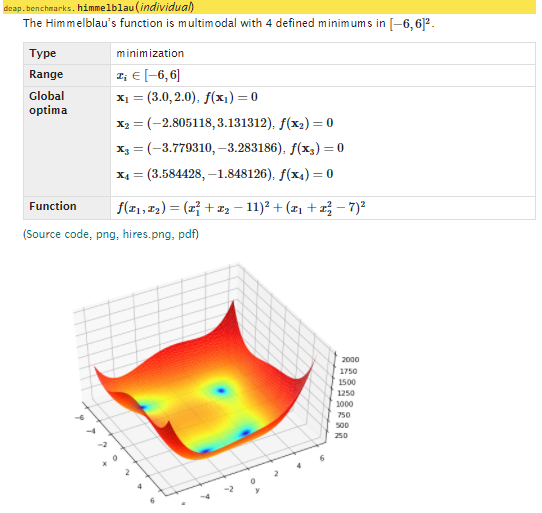

In [ ]:
toolbox = base.Toolbox()

# Generar individuos aleatorios
toolbox.register("attr_bool", random.randint, 0, 50)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(paneles))

# Generar poblaciones aleatorias
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Funciones de aptitud y restricción
toolbox.register("evaluate", aptitud)
toolbox.decorate("evaluate", tools.DeltaPenalty(restriccion, 10000))


# Operadores genéticos
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=probabilidad_mutacion)
toolbox.register("select", tools.selTournament, tournsize=tamano_torneo)




algorithms.eaMuCommaLambda: Este es el(μ+λ)algoritmo evolutivo
parametros:\
población – Una lista de individuos.\
caja de herramientas – A Toolboxque contiene los operadores de evolución.\
mu : el número de individuos a seleccionar para la próxima generación.\
lambda_ : el número de hijos a producir en cada generación.\
cxpb : la probabilidad de que se produzca una descendencia por cruzamiento.\
mutpb : la probabilidad de que se produzca una descendencia por mutación.\
ngen - El número de generación.\
stats : un Statisticsobjeto que se actualiza en el lugar, opcional.\
halloffame : un HallOfFameobjeto que contendrá a los mejores individuos, opcional.\
verbose : si registrar o no las estadísticas.



In [ ]:
# Ejecutar algoritmo evolutivo
pop = toolbox.population(n=tamano_poblacion)
hof = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generaciones,
                                   stats=stats, halloffame=hof, verbose=True)


# Obtener la solución óptima
solucion_optima = hof[0]
aptitud_solucion_optima = aptitud(solucion_optima)[0]

print("Solución óptima: ", solucion_optima)
print("Beneficio total: $", aptitud_solucion_optima)


gen	nevals	avg    	min  	max  
0  	100   	15540.5	10000	57250
1  	64    	22630  	10000	55200
2  	65    	33400  	10000	57800
3  	55    	42519.5	10000	56300
4  	59    	47473.5	10000	57900
5  	57    	47588.5	10000	57900
6  	52    	49746  	10000	57900
7  	66    	50147  	10000	57900
8  	64    	48003  	10000	57600
9  	66    	49680  	10000	57600
10 	66    	48515  	10000	57600
11 	55    	52131  	10000	57600
12 	67    	51645  	10000	57600
13 	67    	57068  	30000	57600
14 	64    	57460  	47200	57600
15 	63    	57220  	19600	57600
16 	64    	56932  	30000	57600
17 	63    	56784  	30000	57600
18 	71    	56932  	30000	57600
19 	60    	57300  	41600	57600
20 	56    	57176  	41600	57600
21 	50    	57024  	30000	57600
22 	56    	57176  	41600	57600
23 	58    	57004  	30000	57600
24 	66    	57600  	57600	57600
25 	65    	56624  	30000	57600
26 	43    	56968  	30000	57600
27 	51    	57004  	30000	57600
28 	72    	56540  	26400	57600
29 	68    	56652  	30000	57600
30 	65    	56932  	30000	57600
31 	57  